In [ ]:
!pip install keras==2.13.1 tensorflow==2.13.1

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2024-06-15 15:42:09.420969: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 15:42:09.421026: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 15:42:09.422603: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Constants
EPOCHS = 100
BATCH_SIZE = 16
NUMBER_OF_CLASSES = 2
LEARNING_RATE = 0.001


In [4]:
# Set up directories and scaling
img_width, img_height, RGB_channels = 224, 224, 3
train_dir = '/kaggle/input/deepfake/deepfake/train'
val_dir = '/kaggle/input/deepfake/deepfake/val'
input_shape = (img_width, img_height, RGB_channels)

# Data Preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.02,
    zoom_range=0.2,
    horizontal_flip=True,
    #rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.9, 1.2]
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    class_mode='binary',
    batch_size=BATCH_SIZE
)

valid_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 308 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [5]:
# Model Building
model = Sequential([
	# Block 1
	Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
	Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    
    # Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)), #strides=(2, 2)),
	
    # Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
	
    # Block 3
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
	
    # Block 4
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
	#Dropout(0.25),
    
    Flatten(),
    
    # Fully connected layers
    #Dense(4096, activation='relu'),
    #Dropout(0.5),
    #Dense(2048, activation='relu'),
    #Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# View summary of the model 
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 111, 111, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 111, 111, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 55, 55, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 55, 55, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 27, 27, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 27, 27, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,244,001 (92.48 MB)

 Trainable params: 24,244,001 (92.48 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model for training
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    metrics=['accuracy']
)

In [7]:
# Create the model fit generator
train_n, val_n = len(train_generator.filenames), len(valid_generator.filenames)
history = model.fit(
    train_generator,
    steps_per_epoch=train_n // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=val_n // BATCH_SIZE,
    verbose=1,
    #callbacks=[es_callback, cp_callback, lr_scheduler]
)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/19 ━━━━━━━━━━━━━━━━━━━━ 8:58 30s/step - accuracy: 0.3750 - loss: 0.6956

I0000 00:00:1718466176.384511    1207 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718466176.406620    1207 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 4/19 ━━━━━━━━━━━━━━━━━━━━ 1:16 5s/step - accuracy: 0.4227 - loss: 0.7049

W0000 00:00:1718466191.595717    1208 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


19/19 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.4591 - loss: 0.7021 - val_accuracy: 0.4062 - val_loss: 0.6940
Epoch 2/100
 1/19 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.4375 - loss: 0.6940

W0000 00:00:1718466195.430364    1208 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 260ms/step - accuracy: 0.4375 - loss: 0.6940 - val_accuracy: 0.8750 - val_loss: 0.6898
Epoch 3/100


W0000 00:00:1718466200.206176    1208 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - accuracy: 0.5214 - loss: 0.6929 - val_accuracy: 0.4688 - val_loss: 0.6949
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4375 - loss: 0.6981 - val_accuracy: 0.6250 - val_loss: 0.6878
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step - accuracy: 0.5457 - loss: 0.6931 - val_accuracy: 0.4688 - val_loss: 0.6940
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6875 - loss: 0.6845 - val_accuracy: 0.6250 - val_loss: 0.6910
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.5304 - loss: 0.6921 - val_accuracy: 0.4688 - val_loss: 0.6956
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5625 - loss: 0.7026 - val_accuracy: 0.6250 - val_loss: 0.6865
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.4602 - loss: 0.6974 - val_accuracy: 0.4688 - val_loss: 0.6952
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 0.6894 - val_accuracy: 0.6250 - val_

In [8]:
model.save('/kaggle/working/insightnet.h5')

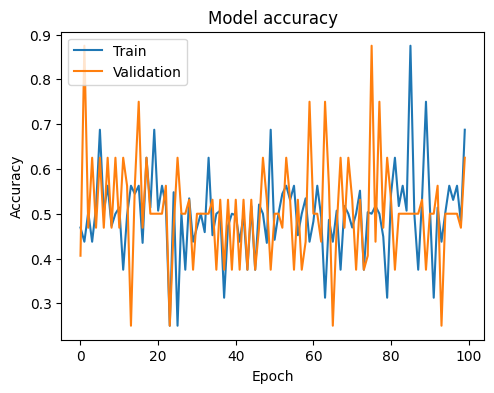

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

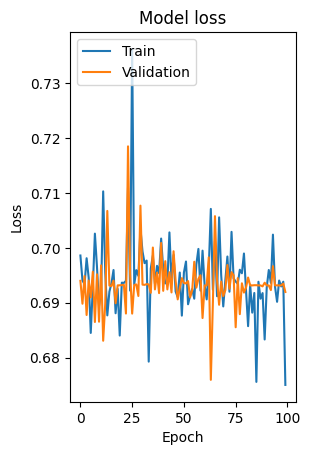

In [10]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
# Assuming the test dataset is organized in a directory similar to the training and validation datasets
test_dir = '/kaggle/input/deepfake/deepfake/test'

# Data Preparation for Test Dataset
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 64 images belonging to 2 classes.


In [21]:
# Load the trained model from the .h5 file
model = tf.keras.models.load_model('/kaggle/working/insightnet.h5')

# Evaluate the model on the test dataset
valid_loss, valid_accuracy = model.evaluate(valid_generator, steps=len(valid_generator), verbose=1)

print(f'Test Loss: {valid_loss}')
print(f'Test Accuracy: {valid_accuracy}')

1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step - accuracy: 0.4375 - loss: 0.6938

W0000 00:00:1718467863.600567    1205 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.4766 - loss: 0.6934
Test Loss: 0.6931588649749756
Test Accuracy: 0.5


W0000 00:00:1718467864.050374    1206 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [ ]:
# Optionally, get the predictions and true labels
predictions = model.predict(valid_generator, steps=len(valid_generator), verbose=1)
print(predictions)
predicted_classes = (predictions > 0.501).astype(int)
true_classes = test_generator.classes

# Print predicted classes for inspection
print("Predicted Classes:")
#print(predicted_classes)

# Print a classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report')
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))

print('Confusion Matrix')
print(confusion_matrix(true_classes, predicted_classes))

# Plotting Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
